In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Load Data Sets

In [3]:
path = "/home/iamchiranjeeb/Desktop/amita/Countries_exercise.csv"
df = pd.read_csv(path)
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [4]:
df.shape

(241, 3)

# Scatter Plot

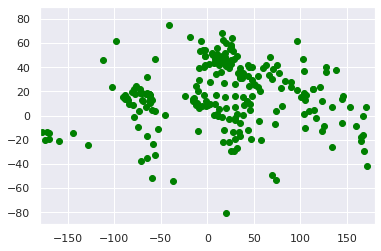

In [7]:
plt.scatter(df['Longitude'],df['Latitude'],color='green')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Selecting Features

In [8]:
x = df.iloc[:,1:]

# Selecting The Number of Clusters

## WCSS

In [11]:
WCSS = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    k_iter = kmeans.inertia_
    WCSS.append(k_iter)

In [12]:
WCSS

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192194.9829002524,
 152164.15221066383,
 126758.35414179866,
 102913.99944185291,
 84945.19461239543]

## The Elbow Method

Text(0, 0.5, 'Within-Clusters Sum Of Sqaure -> ')

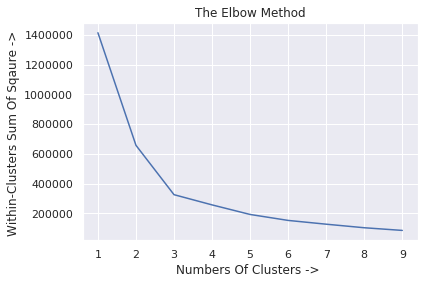

In [13]:
clusters_number = range(1,10)
plt.plot(clusters_number,WCSS)
plt.title('The Elbow Method')
plt.xlabel('Numbers Of Clusters -> ')
plt.ylabel('Within-Clusters Sum Of Sqaure -> ')

# Clustering

In [14]:
model = KMeans(3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Clustering Result

In [15]:
identified_clusters = model.fit_predict(x)
identified_clusters

array([2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0],
      dtype=int32)

In [16]:
data_with_clusters = df.copy()

In [17]:
data_with_clusters['Clusters'] = identified_clusters

In [19]:
data_with_clusters.head()

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0


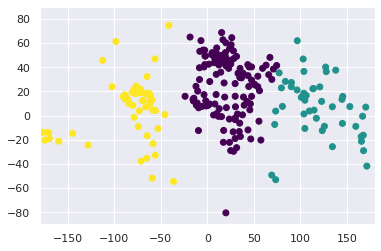

In [21]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='viridis')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()